In [12]:
import pandas as pd
df=pd.read_csv('c:/DataAnalysisProject/gdp.csv')
df.head()

,year,Korea,Japan,United States
0,1960-01-01,3.957874e+09,4.430734e+10,5.433000e+11
1,1961-01-01,2.417238e+09,5.350862e+10,5.633000e+11
2,1962-01-01,2.813934e+09,6.072302e+10,6.051000e+11
3,1963-01-01,3.988246e+09,6.949813e+10,6.386000e+11
4,1964-01-01,3.458518e+09,8.174901e+10,6.858000e+11


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           61 non-null     object 
 1   Korea          57 non-null     float64
 2   Japan          57 non-null     float64
 3   United States  57 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [14]:
df.isnull().sum().sum()

12

In [15]:
df=df.fillna(method='ffill')

In [16]:
df.isnull().sum().sum()

0

In [17]:
from pandas.tseries.offsets import YearEnd 
df['year']=pd.to_datetime(df['year'])
df=df.set_index('year') #year 필드를 인덱스로 설정
df.head()

,Korea,Japan,United States
year,,,
1960-01-01,3.957874e+09,4.430734e+10,5.433000e+11
1961-01-01,2.417238e+09,5.350862e+10,5.633000e+11
1962-01-01,2.813934e+09,6.072302e+10,6.051000e+11
1963-01-01,3.988246e+09,6.949813e+10,6.386000e+11
1964-01-01,3.458518e+09,8.174901e+10,6.858000e+11


<AxesSubplot:xlabel='year'>

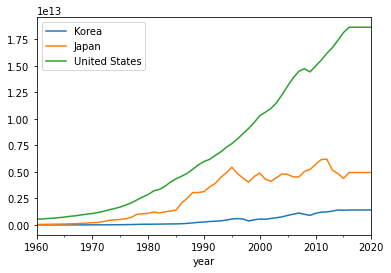

In [18]:
df.plot()

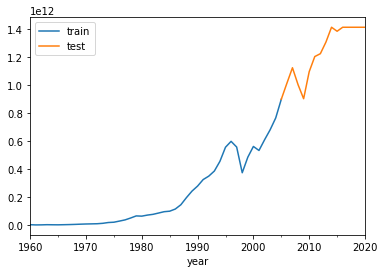

In [19]:
import matplotlib.pyplot as plt 
split_date=pd.Timestamp('2005') #기준 년도
train=df.loc[:split_date, ['Korea']] #학습용
test=df.loc[split_date:, ['Korea']] #검증용
ax=train.plot()
test.plot(ax=ax)
plt.legend(['train','test'])

<AxesSubplot:>

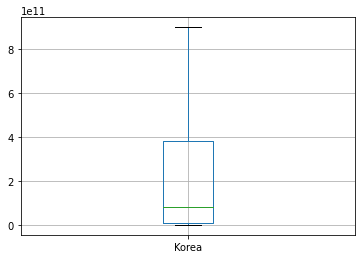

In [20]:
train.boxplot()

<AxesSubplot:>

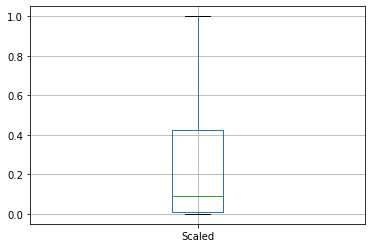

In [21]:
from sklearn.preprocessing import MinMaxScaler 
sc=MinMaxScaler()
sc.fit(train)

train_sc=sc.transform(train)
test_sc=sc.transform(test)

train_sc_df=pd.DataFrame(train_sc,columns=['Scaled'],index=train.index)
test_sc_df=pd.DataFrame(test_sc,columns=['Scaled'],index=test.index)
train_sc_df.boxplot()

In [22]:
s=pd.Series([100,200,300])
s2=s.shift(1)
print(s)
print(s2)

0    100
1    200
2    300
dtype: int64
0      NaN
1    100.0
2    200.0
dtype: float64


In [23]:
for s in range(1,13):
    train_sc_df['shift_{}'.format(s)]=train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)]=test_sc_df['Scaled'].shift(s)

In [24]:
train_sc_df

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
year,,,,,,,,,,,,,
1960-01-01,0.001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-01-01,0.000000,0.001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-01,0.000443,0.000000,0.001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963-01-01,0.001754,0.000443,0.000000,0.001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964-01-01,0.001163,0.001754,0.000443,0.000000,0.001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-01,0.000785,0.001163,0.001754,0.000443,0.000000,0.001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-01-01,0.001687,0.000785,0.001163,0.001754,0.000443,0.000000,0.001720,NaN,NaN,NaN,NaN,NaN,NaN
1967-01-01,0.002721,0.001687,0.000785,0.001163,0.001754,0.000443,0.000000,0.001720,NaN,NaN,NaN,NaN,NaN
1968-01-01,0.004131,0.002721,0.001687,0.000785,0.001163,0.001754,0.000443,0.000000,0.001720,NaN,NaN,NaN,NaN


In [25]:
#결측값이 포함된 처음 12행 제거
X_train=train_sc_df.dropna().drop('Scaled',axis=1)
y_train=train_sc_df.dropna()[['Scaled']]

X_test=test_sc_df.dropna().drop('Scaled',axis=1)
y_test=test_sc_df.dropna()[['Scaled']]

In [26]:
#넘파이배열로 변환
X_train=X_train.values
X_test=X_test.values 
y_train=y_train.values
y_test=y_test.values

In [27]:
#순환신경망에 입력하기 위하여 3차원 형태로 변환
X_train_t=X_train.reshape(X_train.shape[0], 12, 1)
X_test_t=X_test.reshape(X_test.shape[0], 12, 1)

In [28]:
X_train_t.shape

(34, 12, 1)

In [29]:
from keras.layers import LSTM, Dense 
from keras.models import Sequential 
model=Sequential()
model.add(LSTM(20,input_shape=(12,1))) # 타임스텝 12, 변수의 수 1
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train_t, y_train, epochs=250, batch_size=64)

Epoch 1/250
1/1 [==============================] - 3s 3s/step - loss: 0.1748
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 0.1670
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 0.1594
Epoch 4/250
1/1 [==============================] - 0s 11ms/step - loss: 0.1519
Epoch 5/250
1/1 [==============================] - 0s 13ms/step - loss: 0.1446
Epoch 6/250
1/1 [==============================] - 0s 15ms/step - loss: 0.1374
Epoch 7/250
1/1 [==============================] - 0s 16ms/step - loss: 0.1303
Epoch 8/250
1/1 [==============================] - 0s 15ms/step - loss: 0.1234
Epoch 9/250
1/1 [==============================] - 0s 16ms/step - loss: 0.1165
Epoch 10/250
1/1 [==============================] - 0s 19ms/step - loss: 0.1097
Epoch 11/250
1/1 [==============================] - 0s 14ms/step - loss: 0.1030
Epoch 12/250
1/1 [==============================] - 0s 15ms/step - loss: 0.0964
Epoch 13/250
1/1 [==============================] - 

In [32]:
model.evaluate(X_test_t, y_test) #mse

1/1 [==============================] - 1s 684ms/step - loss: 0.2914


0.29139870405197144

In [33]:
y_pred=model.predict(X_test_t)
y_pred

1/1 [==============================] - 1s 615ms/step


array([[1.0265175],
       [1.0293609],
       [1.0316309],
       [1.0448184]], dtype=float32)

In [34]:
import numpy as np 
np.mean(y_test - y_pred) # 오차 

0.5397680075817488

In [35]:
y_train

array([[0.00940582],
       [0.01275471],
       [0.01905149],
       [0.02153298],
       [0.03054761],
       [0.04002127],
       [0.05502098],
       [0.07161921],
       [0.06984727],
       [0.07815877],
       [0.08412921],
       [0.09445721],
       [0.10514471],
       [0.10924819],
       [0.12628923],
       [0.16044724],
       [0.21719601],
       [0.26917879],
       [0.30917233],
       [0.3609575 ],
       [0.3881055 ],
       [0.42857798],
       [0.50594592],
       [0.61817745],
       [0.66503139],
       [0.61970918],
       [0.41511171],
       [0.53904221],
       [0.62432   ],
       [0.59241158],
       [0.67722382],
       [0.75704901],
       [0.85123026],
       [1.        ]])

1/1 [==============================] - 0s 28ms/step


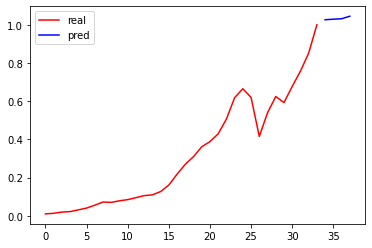

In [36]:
import matplotlib.pyplot as plt 
pred=model.predict(X_test_t)
a=np.concatenate((y_train.flatten(), np.zeros(len(y_test))+np.nan))
b=np.concatenate((np.zeros(len(y_train))+np.nan, pred.flatten()))
plt.plot(a, 'r-', label='real')
plt.plot(b, 'b-', label='pred')
plt.legend()
plt.show()

In [37]:
sc=MinMaxScaler()
sc.fit(train)

train_sc=sc.transform(train)
test_sc=sc.transform(test)

train_sc_df=pd.DataFrame(train_sc,columns=['Scaled'],index=train.index)
test_sc_df=pd.DataFrame(test_sc,columns=['Scaled'],index=test.index)

In [38]:
for s in range(1,6):
    train_sc_df['shift_{}'.format(s)]=train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)]=test_sc_df['Scaled'].shift(s)

In [39]:
train_sc_df

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5
year,,,,,,
1960-01-01,0.001720,NaN,NaN,NaN,NaN,NaN
1961-01-01,0.000000,0.001720,NaN,NaN,NaN,NaN
1962-01-01,0.000443,0.000000,0.001720,NaN,NaN,NaN
1963-01-01,0.001754,0.000443,0.000000,0.001720,NaN,NaN
1964-01-01,0.001163,0.001754,0.000443,0.000000,0.001720,NaN
1965-01-01,0.000785,0.001163,0.001754,0.000443,0.000000,0.001720
1966-01-01,0.001687,0.000785,0.001163,0.001754,0.000443,0.000000
1967-01-01,0.002721,0.001687,0.000785,0.001163,0.001754,0.000443
1968-01-01,0.004131,0.002721,0.001687,0.000785,0.001163,0.001754


In [40]:
#결측값이 포함된 처음 12행 제거
X_train=train_sc_df.dropna().drop('Scaled',axis=1)
y_train=train_sc_df.dropna()[['Scaled']]

X_test=test_sc_df.dropna().drop('Scaled',axis=1)
y_test=test_sc_df.dropna()[['Scaled']]

In [41]:
#넘파이배열로 변환
X_train=X_train.values
X_test=X_test.values 
y_train=y_train.values
y_test=y_test.values

In [42]:
X_train.shape

(41, 5)

In [43]:
#순환신경망에 입력하기 위하여 3차원 형태로 변환
X_train_t=X_train.reshape(X_train.shape[0], 5, 1)
X_test_t=X_test.reshape(X_test.shape[0], 5, 1)

In [44]:
X_train_t.shape

(41, 5, 1)

In [45]:
X_test_t.shape

(11, 5, 1)

In [46]:
from keras.layers import LSTM, Dense 
from keras.models import Sequential 
model=Sequential()
model.add(LSTM(20,input_shape=(5,1))) # 타임스텝 5, 변수의 수 1
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
#LSTM의 default 값은 tanh, Dense의 기본 default 값은 linear, 은닉층에서 쓸 수 있는 게 일반적 기계학습 relu, 순환신경망 tanh, output의 기본 default 값은 linear
#softmax는 출력값이 세 개 이상일 때

In [47]:
model.summary()
#회귀분석이기 때문에 linear를 사용해야 해서 default 값을 썼다

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 20)                1760      
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2,031
Trainable params: 2,031
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train_t, y_train, epochs=250, batch_size=64)

Epoch 1/250
1/1 [==============================] - 3s 3s/step - loss: 0.0936
Epoch 2/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0826
Epoch 3/250
1/1 [==============================] - 0s 5ms/step - loss: 0.0725
Epoch 4/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0633
Epoch 5/250
1/1 [==============================] - 0s 5ms/step - loss: 0.0551
Epoch 6/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0479
Epoch 7/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0416
Epoch 8/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0363
Epoch 9/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0319
Epoch 10/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0285
Epoch 11/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0260
Epoch 12/250
1/1 [==============================] - 0s 10ms/step - loss: 0.0242
Epoch 13/250
1/1 [==============================] - 0s 10ms/s

In [49]:
model.evaluate(X_test_t, y_test) #mse

1/1 [==============================] - 0s 435ms/step - loss: 0.0107


0.010722251608967781

In [50]:
y_pred=model.predict(X_test_t)
y_pred

1/1 [==============================] - 0s 438ms/step


array([[1.2114048],
       [1.248226 ],
       [1.2838215],
       [1.2993436],
       [1.3474298],
       [1.4315505],
       [1.4765745],
       [1.5064294],
       [1.5336505],
       [1.5501636],
       [1.5494457]], dtype=float32)

In [51]:
import numpy as np 
np.mean(y_test - y_pred) # 오차 

0.08332180389941998

In [52]:
y_train

array([[7.84921896e-04],
       [1.68683734e-03],
       [2.72109506e-03],
       [4.13078116e-03],
       [5.87077295e-03],
       [7.34826865e-03],
       [8.34270234e-03],
       [9.40582431e-03],
       [1.27547126e-02],
       [1.90514949e-02],
       [2.15329784e-02],
       [3.05476135e-02],
       [4.00212727e-02],
       [5.50209833e-02],
       [7.16192052e-02],
       [6.98472734e-02],
       [7.81587678e-02],
       [8.41292070e-02],
       [9.44572106e-02],
       [1.05144712e-01],
       [1.09248189e-01],
       [1.26289234e-01],
       [1.60447238e-01],
       [2.17196014e-01],
       [2.69178791e-01],
       [3.09172326e-01],
       [3.60957496e-01],
       [3.88105496e-01],
       [4.28577975e-01],
       [5.05945923e-01],
       [6.18177454e-01],
       [6.65031394e-01],
       [6.19709183e-01],
       [4.15111710e-01],
       [5.39042212e-01],
       [6.24320000e-01],
       [5.92411583e-01],
       [6.77223824e-01],
       [7.57049013e-01],
       [8.51230256e-01],


1/1 [==============================] - 0s 21ms/step


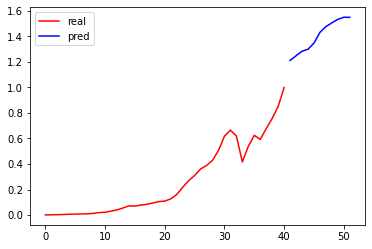

In [53]:
import matplotlib.pyplot as plt 
pred=model.predict(X_test_t)
a=np.concatenate((y_train.flatten(), np.zeros(len(y_test))+np.nan))
b=np.concatenate((np.zeros(len(y_train))+np.nan, pred.flatten()))
plt.plot(a, 'r-', label='real')
plt.plot(b, 'b-', label='pred')
plt.legend()
plt.show()